In [89]:
!pip install -U keras-tuner

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
import keras_tuner as kf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [121]:
df=pd.read_csv("/content/Alphabets_data.csv")

In [122]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


<Axes: >

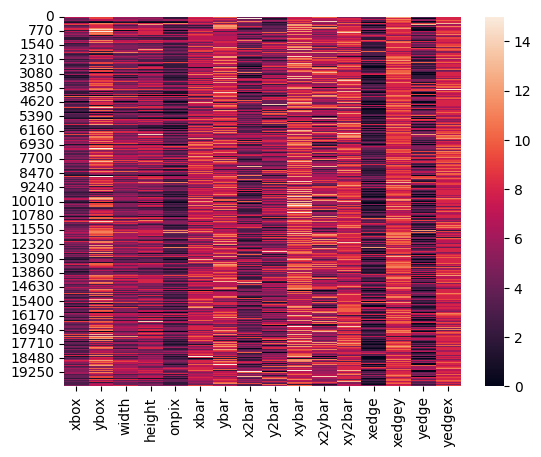

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.drop(['letter'],axis=1))

In [124]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [125]:
df.shape

(20000, 17)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [127]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [128]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [129]:
label_encoder = LabelEncoder()
label_encoder.fit(df['letter'])
df['letter'] =label_encoder.fit_transform(df['letter'])

In [130]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [131]:
features = df.drop('letter', axis=1)

In [132]:
features

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [133]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)

In [134]:
df_scaled

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [135]:
X = df_scaled
y = df['letter']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(4000, 16)
(16000, 16)
(4000,)
(16000,)


In [138]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [139]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(df['letter'].unique()), activation='softmax')])

In [140]:
model

In [141]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [142]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
400/400 [==============================] - 2s 2ms/step - loss: 1.7745 - accuracy: 0.5173 - val_loss: 1.0644 - val_accuracy: 0.7116
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.8580 - accuracy: 0.7538 - val_loss: 0.7633 - val_accuracy: 0.7844
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.6581 - accuracy: 0.8062 - val_loss: 0.6177 - val_accuracy: 0.8228
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5425 - accuracy: 0.8386 - val_loss: 0.5261 - val_accuracy: 0.8453
Epoch 5/10
400/400 [==============================] - 1s 3ms/step - loss: 0.4641 - accuracy: 0.8602 - val_loss: 0.4633 - val_accuracy: 0.8587
Epoch 6/10
400/400 [==============================] - 1s 3ms/step - loss: 0.4100 - accuracy: 0.8755 - val_loss: 0.4204 - val_accuracy: 0.8716
Epoch 7/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8892 - val_loss: 0.3737 - val_accuracy: 0.8828
Epoch 

In [143]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

125/125 [==============================] - 0s 1ms/step - loss: 0.2833 - accuracy: 0.9143
Test accuracy: 0.9142500162124634


HyperParameter Tunnig


In [144]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [145]:
def build_model(hp):
    Sequential().add(Dense(units=hp.Int('units_input', min_value=32, max_value=412, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 3)):
        Sequential().add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=412, step=32), activation='relu'))
    Sequential().add(Dense(len(df['letter'].unique()), activation='softmax'))

    Sequential().compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return Sequential()


In [146]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='tuning_dir',
    project_name='alphabets'
)

Reloading Tuner from tuning_dir/alphabets/tuner0.json


In [147]:
tuner.search(X_train, y_train, epochs=5, validation_split=0.2)


In [149]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [150]:
best_model = tuner.hypermodel.build(best_hyperparameters)

In [151]:
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Test accuracy of the tuned model:", test_acc)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [152]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [153]:
y_pred = best_model.predict(X_test)
y_pred

125/125 [==============================] - 0s 1ms/step


array([[-0.5350039 , -0.31336316, -0.06048578, ..., -0.8656262 ,
         1.288757  , -1.1136187 ],
       [-0.01230945,  1.1997375 ,  0.43590966, ...,  1.7205521 ,
         1.288757  , -1.7318838 ],
       [-0.5350039 , -0.9186034 , -0.06048578, ..., -1.5121708 ,
        -0.6590356 ,  0.12291107],
       ...,
       [ 0.510385  ,  0.89711744,  0.9323051 , ..., -0.21908163,
         0.12008142,  0.12291107],
       [-0.01230945, -0.6159833 , -0.06048578, ...,  1.0740075 ,
         2.067874  , -1.7318838 ],
       [-1.0576982 , -0.6159833 , -0.55688125, ...,  1.7205521 ,
        -0.6590356 ,  0.12291107]], dtype=float32)

In [154]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [155]:
y_pred_classes

array([14,  4,  5, ...,  7, 14, 10])

In [156]:
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

Accuracy: 0.06675


In [157]:
precision = precision_score(y_test, y_pred_classes, average='macro')
print("Precision:", precision)

Precision: 0.036973437805643286


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
recall = recall_score(y_test, y_pred_classes, average='macro')
print("Recall:", recall)

Recall: 0.06644480686976317


In [159]:
f1 = f1_score(y_test, y_pred_classes, average='macro')
print("F1-score:", f1)

F1-score: 0.04686715265401463
